In [2]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import keras

from keras.models import model_from_json

from plot_carbon_isopleth import load_dataset, load_reshape_dataset

%matplotlib inline

Using TensorFlow backend.


# Plot experimental isopleth

In [4]:
dataset = load_reshape_dataset('../../databases/Tcritical.csv')
dataset.keys()

odict_keys(['file', 'macro', 'C', 'Mn', 'Si', 'Cr', 'Ni', 'A1', 'A1prime', 'A3', 'eutectoid', 'idx'])

In [15]:
dataset['A3'].shape

(11, 5, 5, 5, 5)

Text(0, 0.5, 'Temperatura A3 (°C)')

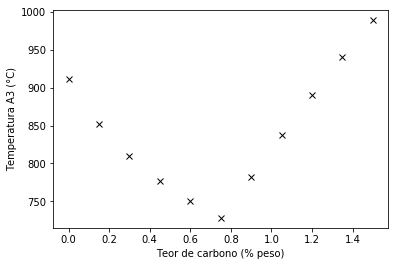

In [16]:
#experimental isopleth
plt.plot(dataset['C'][:,0,0,0,0], dataset['A3'][:,0,0,0,0], 'kx')
plt.xlabel('Teor de carbono (% peso)')
plt.ylabel('Temperatura A3 (°C)')

# Plot predicted isopleth

## Scalers

In [18]:
###### Define the normalizing operator *scaler*

# Load dataset as pandas DataFrame
df = load_dataset('../../databases/Tcritical.csv')
df = df.drop(['file','macro','A1','A1prime','eutectoid'], axis=1)
# REMOVE ALL A3 NAN
is_na = df['A3'].isna() 
df = df.loc[~is_na, :]
    
# Define scaler for compositions only
scaler_comp = MinMaxScaler(feature_range=[-1, 1])
scaler_comp.fit(df.loc[:,['C','Mn','Si','Cr','Ni']])

# Define scaler for A3 temperature only
scaler_A3 = MinMaxScaler(feature_range=[-1, 1])
scaler_A3.fit(df.loc[:,['A3']])

MinMaxScaler(copy=True, feature_range=[-1, 1])

## The Model
Neural network using activation function = tanh, learning rate = 0.001, neurons in hidden layer = 6

In [23]:
# load json and create model
json_file = open('models/model0.001_6.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

# load weights into new model
model.load_weights('models/model0.001_6.h5')

## Carbon isopleth

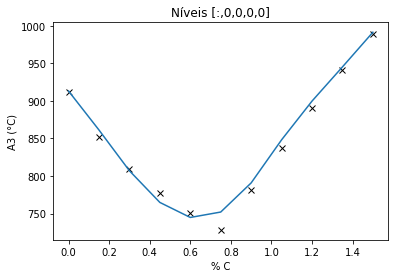

In [62]:
# X: composition
X = pd.DataFrame()
X['C'] = dataset['C'][:,0,0,0,0]
X['Mn'] = dataset['Mn'][:,0,0,0,0]
X['Si'] = dataset['Si'][:,0,0,0,0]
X['Cr'] = dataset['Cr'][:,0,0,0,0]
X['Ni'] = dataset['Ni'][:,0,0,0,0]
# print(X.head())

# Xnorm: normalized X
Xnorm = X.copy()
Xnorm.loc[:,:] = scaler_comp.transform(X)
# print(Xnorm.head())

# predicted values
y_norm = model.predict(Xnorm)
# undo A3 normalization
y = scaler_A3.inverse_transform(y_norm)

fig, ax = plt.subplots()
plt.plot(dataset['C'][:,0,0,0,0], dataset['A3'][:,0,0,0,0], 'kx')
plt.plot(dataset['C'][:,0,0,0,0], y)
ax.set_xlabel('% C')
ax.set_ylabel('A3 (°C)')
plt.title('Níveis [:,0,0,0,0]')
plt.savefig('img/isopleths/C0.png')

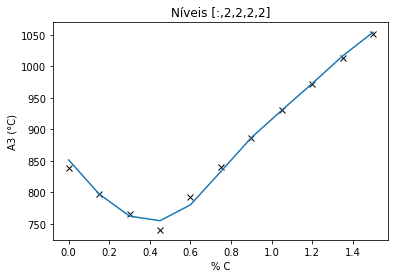

In [63]:
# X: composition
X = pd.DataFrame()
X['C'] = dataset['C'][:,2,2,2,2]
X['Mn'] = dataset['Mn'][:,2,2,2,2]
X['Si'] = dataset['Si'][:,2,2,2,2]
X['Cr'] = dataset['Cr'][:,2,2,2,2]
X['Ni'] = dataset['Ni'][:,2,2,2,2]
# print(X.head())

# Xnorm: normalized X
Xnorm = X.copy()
Xnorm.loc[:,:] = scaler_comp.transform(X)
# print(Xnorm.head())

# predicted values
y_norm = model.predict(Xnorm)
# undo A3 normalization
y = scaler_A3.inverse_transform(y_norm)

fig, ax = plt.subplots()
plt.plot(dataset['C'][:,2,2,2,2], dataset['A3'][:,2,2,2,2], 'kx')
plt.plot(dataset['C'][:,2,2,2,2], y)
ax.set_xlabel('% C')
ax.set_ylabel('A3 (°C)')
plt.title('Níveis [:,2,2,2,2]')
plt.savefig('img/isopleths/C2.png')

## Manganese isopleth

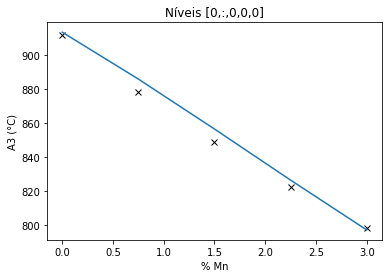

In [64]:
# X: composition
X = pd.DataFrame()
X['C'] = dataset['C'][0,:,0,0,0]
X['Mn'] = dataset['Mn'][0,:,0,0,0]
X['Si'] = dataset['Si'][0,:,0,0,0]
X['Cr'] = dataset['Cr'][0,:,0,0,0]
X['Ni'] = dataset['Ni'][0,:,0,0,0]

# Xnorm: normalized X
Xnorm = X.copy()
Xnorm.loc[:,:] = scaler_comp.transform(X)

# predicted values
y_norm = model.predict(Xnorm)
# undo A3 normalization
y = scaler_A3.inverse_transform(y_norm)

# expected values
fig, ax = plt.subplots()
plt.plot(dataset['Mn'][0,:,0,0,0], dataset['A3'][0,:,0,0,0], 'kx')
plt.plot(dataset['Mn'][0,:,0,0,0], y)
ax.set_xlabel('% Mn')
ax.set_ylabel('A3 (°C)')
plt.title('Níveis [0,:,0,0,0]')
plt.savefig('img/isopleths/Mn0.png')

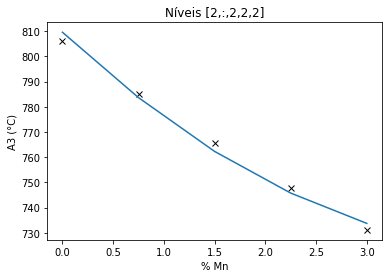

In [65]:
# X: composition
X = pd.DataFrame()
X['C'] = dataset['C'][2,:,2,2,2]
X['Mn'] = dataset['Mn'][2,:,2,2,2]
X['Si'] = dataset['Si'][2,:,2,2,2]
X['Cr'] = dataset['Cr'][2,:,2,2,2]
X['Ni'] = dataset['Ni'][2,:,2,2,2]

# Xnorm: normalized X
Xnorm = X.copy()
Xnorm.loc[:,:] = scaler_comp.transform(X)

# predicted values
y_norm = model.predict(Xnorm)
# undo A3 normalization
y = scaler_A3.inverse_transform(y_norm)

# expected values
fig, ax = plt.subplots()
plt.plot(dataset['Mn'][2,:,2,2,2], dataset['A3'][2,:,2,2,2], 'kx')
plt.plot(dataset['Mn'][2,:,2,2,2], y)
ax.set_xlabel('% Mn')
ax.set_ylabel('A3 (°C)')
plt.title('Níveis [2,:,2,2,2]')
plt.savefig('img/isopleths/Mn2.png')

## Silicon isopleth

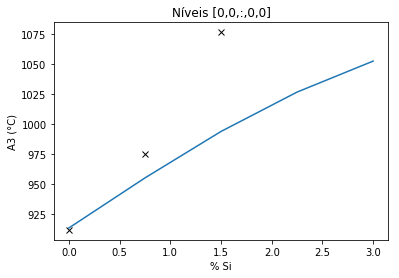

In [66]:
# X: composition
X = pd.DataFrame()
X['C'] = dataset['C'][0,0,:,0,0]
X['Mn'] = dataset['Mn'][0,0,:,0,0]
X['Si'] = dataset['Si'][0,0,:,0,0]
X['Cr'] = dataset['Cr'][0,0,:,0,0]
X['Ni'] = dataset['Ni'][0,0,:,0,0]

# Xnorm: normalized X
Xnorm = X.copy()
Xnorm.loc[:,:] = scaler_comp.transform(X)

# predicted values
y_norm = model.predict(Xnorm)
# undo A3 normalization
y = scaler_A3.inverse_transform(y_norm)

# expected values
fig, ax = plt.subplots()
plt.plot(dataset['Si'][0,0,:,0,0], dataset['A3'][0,0,:,0,0], 'kx')
plt.plot(dataset['Si'][0,0,:,0,0], y)
ax.set_xlabel('% Si')
ax.set_ylabel('A3 (°C)')
plt.title('Níveis [0,0,:,0,0]')
plt.savefig('img/isopleths/Si0.png')

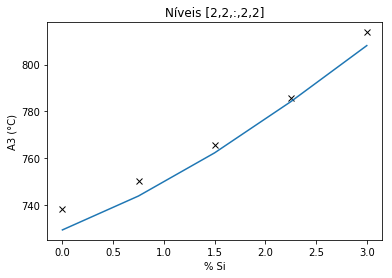

In [67]:
# X: composition
X = pd.DataFrame()
X['C'] = dataset['C'][2,2,:,2,2]
X['Mn'] = dataset['Mn'][2,2,:,2,2]
X['Si'] = dataset['Si'][2,2,:,2,2]
X['Cr'] = dataset['Cr'][2,2,:,2,2]
X['Ni'] = dataset['Ni'][2,2,:,2,2]

# Xnorm: normalized X
Xnorm = X.copy()
Xnorm.loc[:,:] = scaler_comp.transform(X)

# predicted values
y_norm = model.predict(Xnorm)
# undo A3 normalization
y = scaler_A3.inverse_transform(y_norm)

# expected values
fig, ax = plt.subplots()
plt.plot(dataset['Si'][2,2,:,2,2], dataset['A3'][2,2,:,2,2], 'kx')
plt.plot(dataset['Si'][2,2,:,2,2], y)
ax.set_xlabel('% Si')
ax.set_ylabel('A3 (°C)')
plt.title('Níveis [2,2,:,2,2]')
plt.savefig('img/isopleths/Si2.png')

## Chrome isopleth

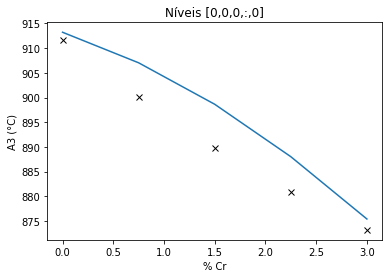

In [68]:
# X: composition
X = pd.DataFrame()
X['C'] = dataset['C'][0,0,0,:,0]
X['Mn'] = dataset['Mn'][0,0,0,:,0]
X['Si'] = dataset['Si'][0,0,0,:,0]
X['Cr'] = dataset['Cr'][0,0,0,:,0]
X['Ni'] = dataset['Ni'][0,0,0,:,0]

# Xnorm: normalized X
Xnorm = X.copy()
Xnorm.loc[:,:] = scaler_comp.transform(X)

# predicted values
y_norm = model.predict(Xnorm)
# undo A3 normalization
y = scaler_A3.inverse_transform(y_norm)

# expected values
fig, ax = plt.subplots()
plt.plot(dataset['Cr'][0,0,0,:,0], dataset['A3'][0,0,0,:,0], 'kx')
plt.plot(dataset['Cr'][0,0,0,:,0], y)
ax.set_xlabel('% Cr')
ax.set_ylabel('A3 (°C)')
plt.title('Níveis [0,0,0,:,0]')
plt.savefig('img/isopleths/Cr0.png')

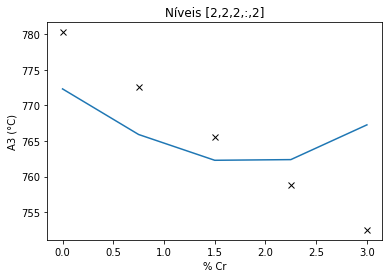

In [69]:
# X: composition
X = pd.DataFrame()
X['C'] = dataset['C'][2,2,2,:,2]
X['Mn'] = dataset['Mn'][2,2,2,:,2]
X['Si'] = dataset['Si'][2,2,2,:,2]
X['Cr'] = dataset['Cr'][2,2,2,:,2]
X['Ni'] = dataset['Ni'][2,2,2,:,2]

# Xnorm: normalized X
Xnorm = X.copy()
Xnorm.loc[:,:] = scaler_comp.transform(X)

# predicted values
y_norm = model.predict(Xnorm)
# undo A3 normalization
y = scaler_A3.inverse_transform(y_norm)

# expected values
fig, ax = plt.subplots()
plt.plot(dataset['Cr'][2,2,2,:,2], dataset['A3'][2,2,2,:,2], 'kx')
plt.plot(dataset['Cr'][2,2,2,:,2], y)
ax.set_xlabel('% Cr')
ax.set_ylabel('A3 (°C)')
plt.title('Níveis [2,2,2,:,2]')
plt.savefig('img/isopleths/Cr2.png')

## Nickel isopleth

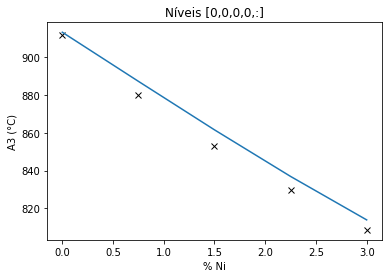

In [70]:
# X: composition
X = pd.DataFrame()
X['C'] = dataset['C'][0,0,0,0,:]
X['Mn'] = dataset['Mn'][0,0,0,0,:]
X['Si'] = dataset['Si'][0,0,0,0,:]
X['Cr'] = dataset['Cr'][0,0,0,0,:]
X['Ni'] = dataset['Ni'][0,0,0,0,:]

# Xnorm: normalized X
Xnorm = X.copy()
Xnorm.loc[:,:] = scaler_comp.transform(X)

# predicted values
y_norm = model.predict(Xnorm)
# undo A3 normalization
y = scaler_A3.inverse_transform(y_norm)

# expected values
fig, ax = plt.subplots()
plt.plot(dataset['Ni'][0,0,0,0,:], dataset['A3'][0,0,0,0,:], 'kx')
plt.plot(dataset['Ni'][0,0,0,0,:], y)
ax.set_xlabel('% Ni')
ax.set_ylabel('A3 (°C)')
plt.title('Níveis [0,0,0,0,:]')
plt.savefig('img/isopleths/Ni0.png')

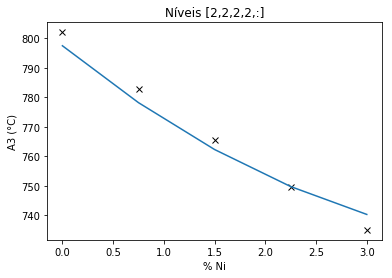

In [71]:
# X: composition
X = pd.DataFrame()
X['C'] = dataset['C'][2,2,2,2,:]
X['Mn'] = dataset['Mn'][2,2,2,2,:]
X['Si'] = dataset['Si'][2,2,2,2,:]
X['Cr'] = dataset['Cr'][2,2,2,2,:]
X['Ni'] = dataset['Ni'][2,2,2,2,:]

# Xnorm: normalized X
Xnorm = X.copy()
Xnorm.loc[:,:] = scaler_comp.transform(X)

# predicted values
y_norm = model.predict(Xnorm)
# undo A3 normalization
y = scaler_A3.inverse_transform(y_norm)

# expected values
fig, ax = plt.subplots()
plt.plot(dataset['Ni'][2,2,2,2,:], dataset['A3'][2,2,2,2,:], 'kx')
plt.plot(dataset['Ni'][2,2,2,2,:], y)
ax.set_xlabel('% Ni')
ax.set_ylabel('A3 (°C)')
plt.title('Níveis [2,2,2,2,:]')
plt.savefig('img/isopleths/Ni2.png')